In [1]:
import seaborn as sns
sns.set(font_scale=1)

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

## 데이터 로드

In [4]:
retail = pd.read_csv("../../data/dataset/Online Retail Clean.csv")

## 데이터 탐색

In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      397884 non-null  int64  
 1   StockCode      397884 non-null  object 
 2   Description    397884 non-null  object 
 3   Quantity       397884 non-null  int64  
 4   InvoiceDate    397884 non-null  object 
 5   UnitPrice      397884 non-null  float64
 6   CustomerID     397884 non-null  int64  
 7   Country        397884 non-null  object 
 8   CheckoutPrice  397884 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 27.3+ MB


#### InvoiceDate 데이터 타입 변환

In [6]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [7]:
print(retail['InvoiceDate'].dtypes)

datetime64[ns]


### 해당 기간의 매출
- 전체 매출
- 국가별 매출
- 월별 매출
- 요일별 매출
- 시간별 매출

In [8]:
# 전체 매출

total_revenue = retail['CheckoutPrice'].sum() # total_revenue = np.sum(retail['CheckoutPrice'])

In [9]:
total_revenue

8911407.904

In [10]:
# 국가별 매출

rev_by_countries = retail.groupby('Country')[['CheckoutPrice']].sum().sort_values('CheckoutPrice', ascending=False)
rev_by_countries

# rev_by_countries = retail.groupby('Country')[['CheckoutPrice']].sum().sort_values('CheckoutPrice',ascending=False)
# rev_by_countries 

,CheckoutPrice
Country,
United Kingdom,7308391.554
Netherlands,285446.340
EIRE,265545.900
Germany,228867.140
France,209024.050
Australia,138521.310
Spain,61577.110
Switzerland,56443.950
Belgium,41196.340


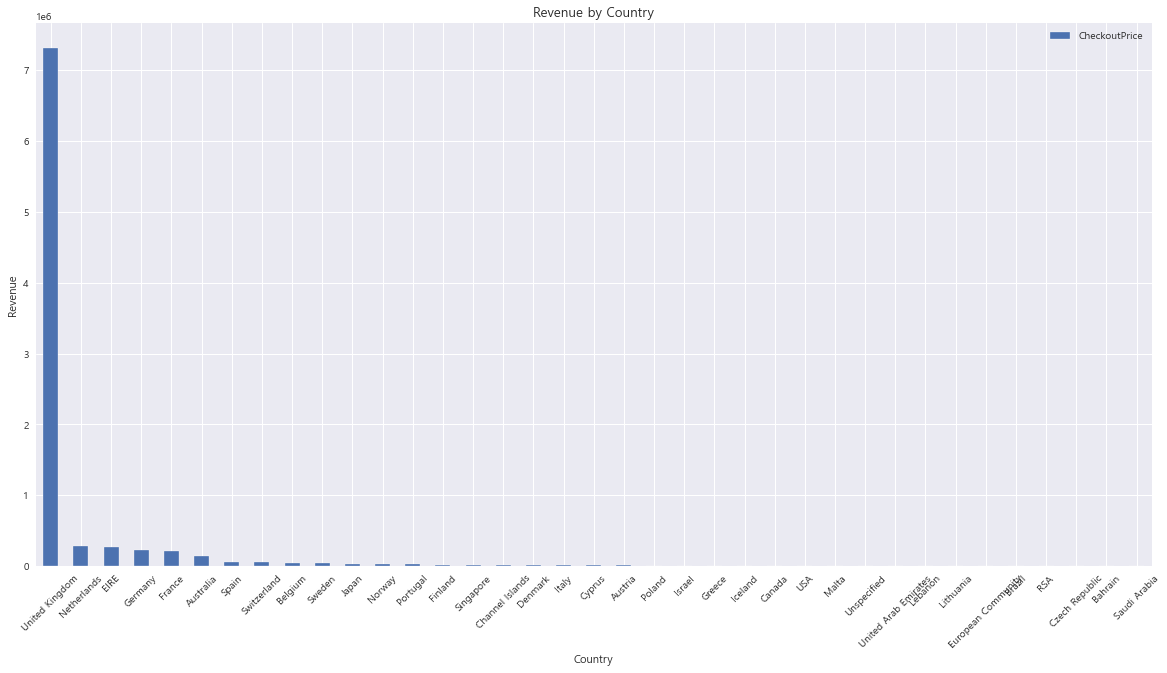

In [25]:
plot_bar(rev_by_countries, "Country","Revenue","Revenue by Country")

# ax = rev_by_countries.plot.bar(figsize=(20,10))
# ax.set_xlabel("Country", fontsize=11)
# ax.set_ylabel("Revenue", fontsize=11)
# ax.set_title("Revenue by Country", fontsize=13)

In [12]:
rev_by_countries / total_revenue

,CheckoutPrice
Country,
United Kingdom,0.820116
Netherlands,0.032032
EIRE,0.029798
Germany,0.025682
France,0.023456
Australia,0.015544
Spain,0.006910
Switzerland,0.006334
Belgium,0.004623


#### 월별 매출

In [13]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [14]:
print(retail['InvoiceDate'].dtypes)

datetime64[ns]


In [15]:
# 201001 201010

def extract_month(date):
    month = str(date.month)
    
    if date.month < 10:
        month = "0"+month
    return str(date.year) + month



In [16]:
rev_by_month = retail.set_index("InvoiceDate").groupby(extract_month)['CheckoutPrice'].sum()
rev_by_month

InvoiceDate
201012     572713.890
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: CheckoutPrice, dtype: float64

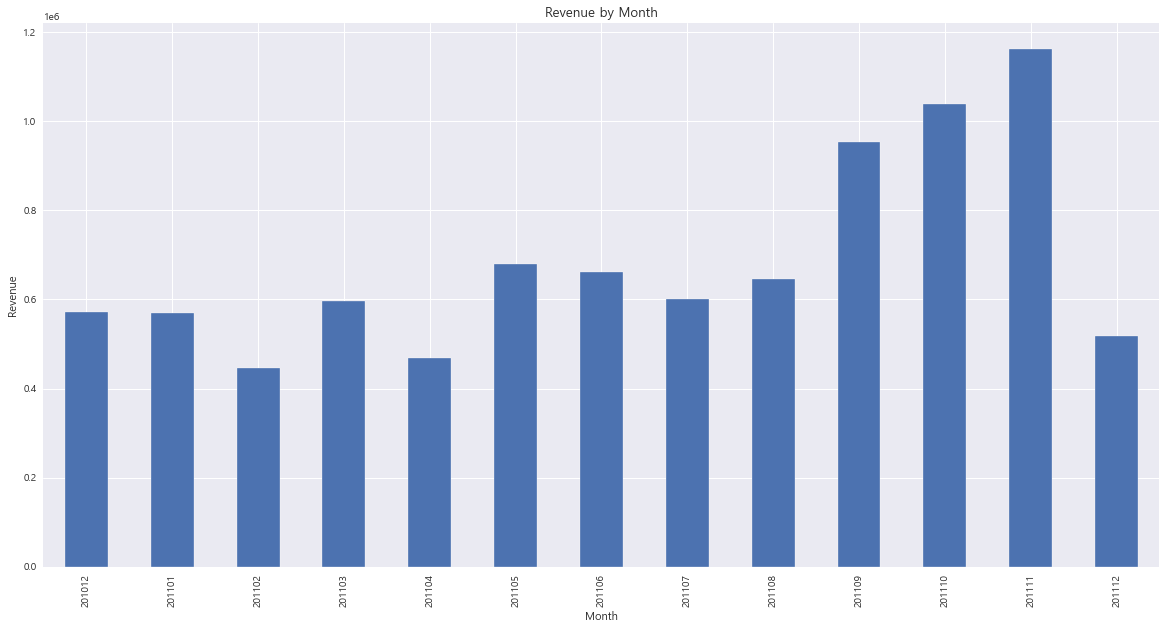

In [19]:
ax = rev_by_month.plot.bar(figsize=(20, 10))
ax.set_xlabel("Month",fontsize=11)
ax.set_ylabel("Revenue",fontsize=11)
ax.set_title("Revenue by Month", fontsize=13);

#### 요일별 매출

In [18]:
rev_by_dow = retail.set_index("InvoiceDate").groupby(lambda date:date.dayofweek)["CheckoutPrice"].sum()
rev_by_dow

InvoiceDate
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

0 : 월요일 , 1 : 화요일 ....

In [21]:
COLORS = sns.color_palette()

In [23]:
# 차트 함수화
def plot_bar(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20,10), rotation=45):
    plot = df.plot(kind="bar", color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index,rotation=45)

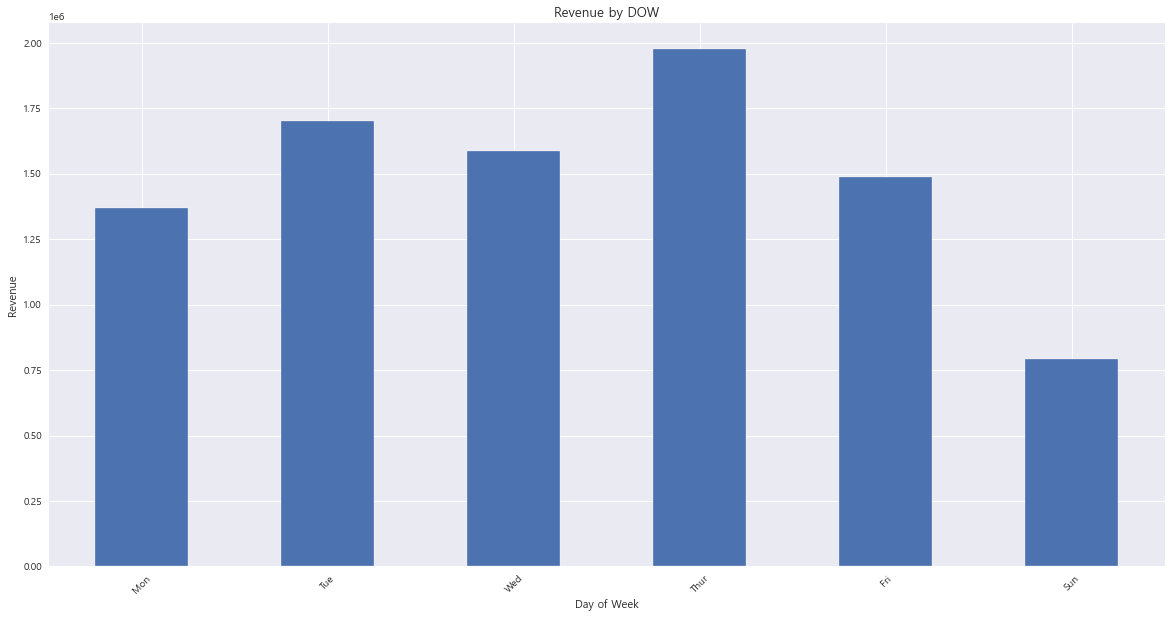

In [24]:
DAY_OF_WEEK = np.array(['Mon','Tue','Wed','Thur','Fri','Sat','Sun'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]

plot_bar(rev_by_dow,"Day of Week", "Revenue", "Revenue by DOW")

### 시간별 매출

In [26]:
rev_by_hour = retail.set_index("InvoiceDate").groupby(lambda date:date.hour)['CheckoutPrice'].sum()
rev_by_hour

InvoiceDate
6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: CheckoutPrice, dtype: float64

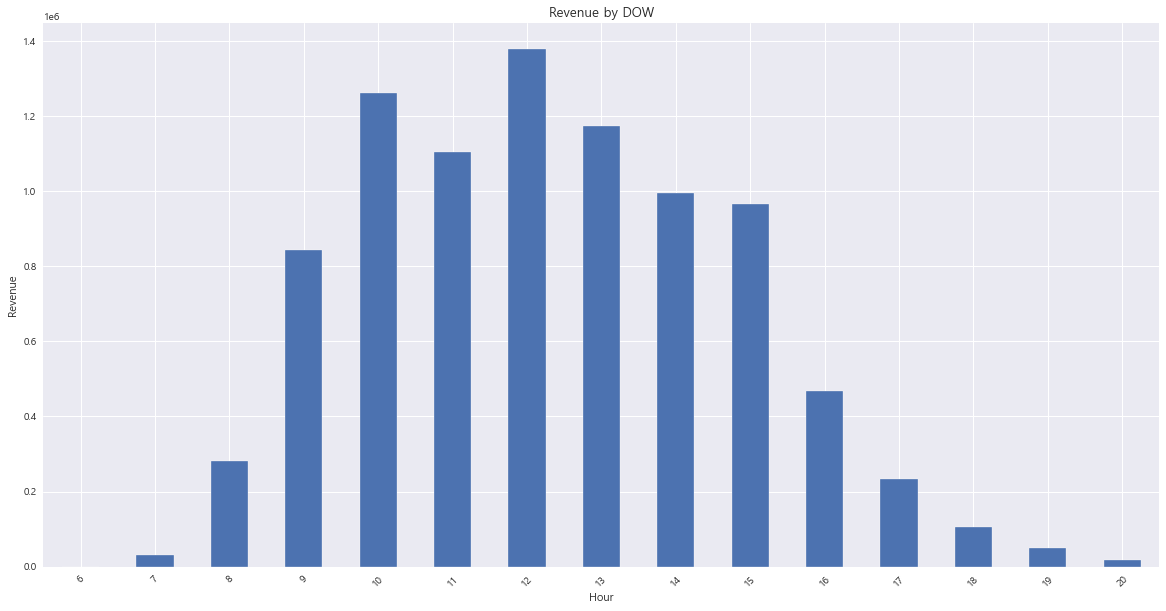

In [27]:
plot_bar(rev_by_hour, "Hour", "Revenue", "Revenue by DOW")

#### 매출 데이터로부터 insight

- 전체 매출액의 82%가 UK에서 발생
- 2011년도의 가장 주문이 많이 발생한달 11월(12월 전체 데이터가 반영되지 않았음)
- 일주일 중 목요일까지는 증가세를 보이다가, 이후로 하락

#### 제품
- Top 10 판매 제품 (Quantity)
- Top 10 매출 제품 (CheckoutPrice)


In [33]:
retail.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64

In [34]:
retail.groupby('StockCode')['CheckoutPrice'].sum().sort_values(ascending=False).head(10)

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

#### top3 아이템의 월별 판매량 추이

In [38]:
top3 = retail.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(3)
top3

StockCode
23843    80995
23166    77916
84077    54415
Name: Quantity, dtype: int64

In [40]:
top3_gb = retail.set_index('InvoiceDate').groupby(['StockCode',extract_month])[['Quantity','CheckoutPrice']].sum()
top3_gb

Quantity  CheckoutPrice
StockCode InvoiceDate                         
10002     201012            224         190.40
          201101            337         286.45
          201102             50          42.50
          201103             23          19.55
          201104            189         160.65
...                         ...            ...
POST      201108            237        5185.95
          201109            279        5894.50
          201110            338        7993.50
          201111            460       10349.95
          201112            123        2760.00

[30407 rows x 2 columns]

In [42]:
top3_selling = top3_gb.loc[top3.index]
top3_selling

Quantity  CheckoutPrice
StockCode InvoiceDate                         
23843     201112          80995      168469.60
23166     201101          74215       77183.60
          201105            792         869.04
          201106            391         458.51
          201107            718         826.94
          201108            405         486.09
          201109            342         397.26
          201110            235         283.67
          201111            631         708.11
          201112            187         203.51
84077     201012           5139        1150.47
          201101           1488         385.44
          201102           3457         795.17
          201103           3888         943.20
          201104          10224        2281.44
          201105           4944        1249.44
          201106           1920         533.76
          201107           3600         982.56
          201108           2256         654.24
          201109           3462         985.70
          201110           8174        1953.98
          201111           4500        1294.20
          201112           1363         376.65

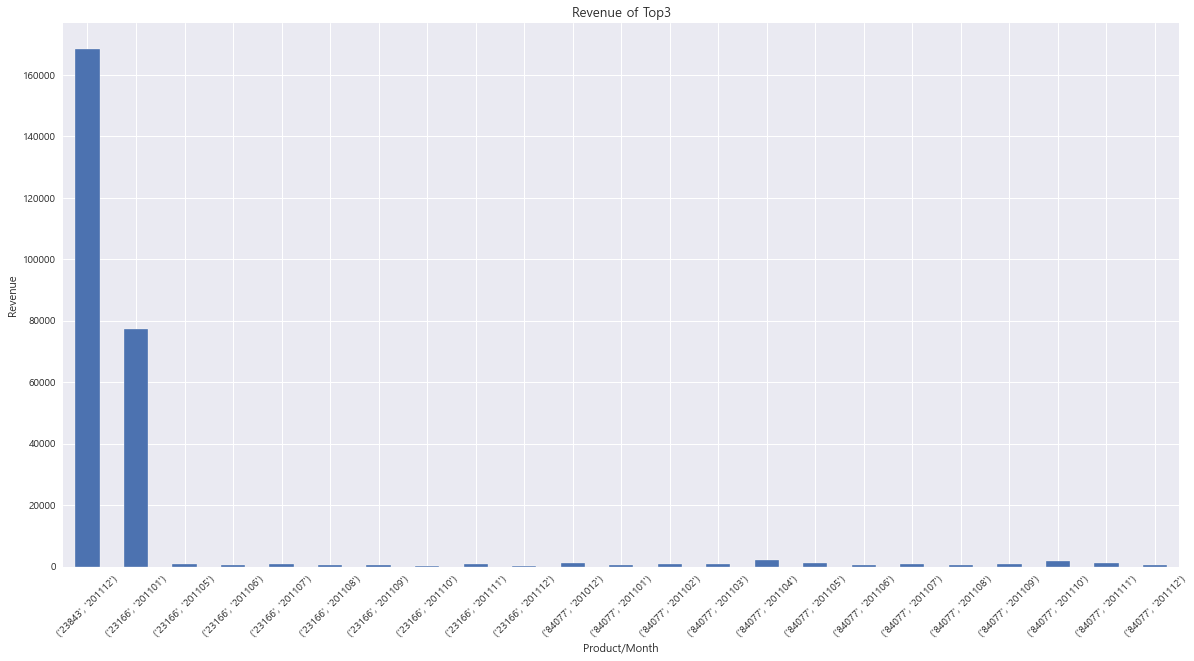

In [43]:
plot_bar(top3_selling['CheckoutPrice'],'Product/Month', "Revenue", "Revenue of Top3")